In [10]:
#Import the libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
import csv
import random
from datetime import datetime, timedelta

## Analysis

In [88]:
df_main = pd.read_csv("/Users/acemitto/Desktop/traffic_measurement_tw.csv")
num_lines = df_main.shape[0]
print("Number of lines in the CSV file: ", num_lines)

df_main


Number of lines in the CSV file:  596


,no,Day,Hour,Time,Location,Type,Speed,Status
0,1,2023-12-23,16,2023-12-23 16:00:01.698675,NaN,Car,25.605214,OK
1,2,2023-12-23,16,2023-12-23 16:00:03.183616,NaN,Car,53.270159,OK
2,3,2023-12-23,16,2023-12-23 16:00:08.780973,NaN,Motocycle,46.234117,OK
3,4,2023-12-23,16,2023-12-23 16:00:24.879687,NaN,Car,44.878214,OK
4,5,2023-12-23,16,2023-12-23 16:00:29.816548,NaN,Car,30.111069,OK
...,...,...,...,...,...,...,...,...
591,592,2023-12-23,16,2023-12-23 16:29:52.994396,NaN,Motocycle,53.284307,OK
592,593,2023-12-23,16,2023-12-23 16:29:53.490403,NaN,Car,29.446115,OK
593,594,2023-12-23,16,2023-12-23 16:29:56.820399,NaN,Car,37.772036,OK
594,595,2023-12-23,16,2023-12-23 16:29:58.260595,NaN,Car,52.108921,OK


In [89]:
df_oneDay = df_main
df_oneDay_moto = df_oneDay[df_oneDay['Type'] == "Motocycle"]
df_oneDay_car = df_oneDay[df_oneDay['Type'] == "Car"]
df_oneDay_truck = df_oneDay[df_oneDay['Type'] == "Truck"]
df_oneDay_bus = df_oneDay[df_oneDay['Type'] == "Bus"]

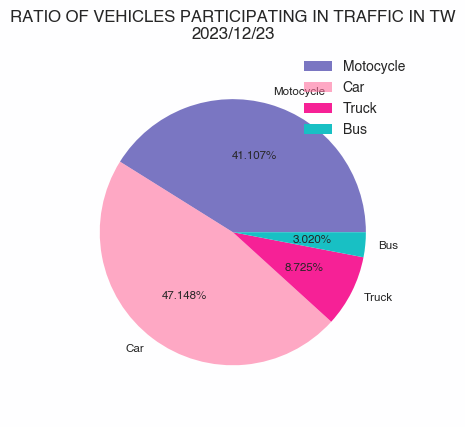

In [110]:
sizes = np.array([len(df_oneDay_moto), len(df_oneDay_car), len(df_oneDay_truck), len(df_oneDay_bus)])
labels = ["Motocycle", "Car", "Truck", "Bus"]
plt.subplots()

plt.pie(sizes, labels=labels, autopct='%1.3f%%', textprops={'size': 'smaller'}, radius=0.9)
plt.legend()
plt.title("RATIO OF VEHICLES PARTICIPATING IN TRAFFIC IN TW\n2023/12/23")  # add title 
plt.show()

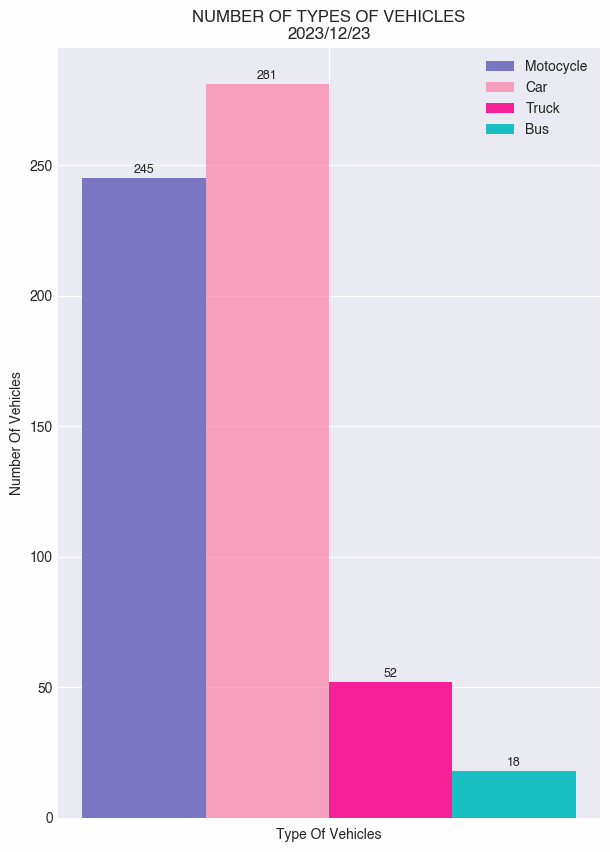

In [111]:
# create data 
col = np.arange(1) 
moto_in_hour_count = [len(df_oneDay_moto)]
car_in_hour_count = [len(df_oneDay_car)]
truck_in_hour_count = [len(df_oneDay_truck)]
bus_in_hour_count = [len(df_oneDay_bus)]
label = [""]
width = 0.2
  
# plot data in grouped manner of bar type 
plt.figure(figsize=(7,10))
plt.bar(col-0.3, moto_in_hour_count, width) 
plt.bar(col-0.1, car_in_hour_count, width) 
plt.bar(col+0.1, truck_in_hour_count, width) 
plt.bar(col+0.3, bus_in_hour_count, width) 
plt.xticks(col, label)
plt.xlabel("Type Of Vehicles")  # add X-axis label 
plt.ylabel("Number Of Vehicles")  # add Y-axis label 
plt.legend(["Motocycle", "Car", "Truck", "Bus"]) 

for j, v in enumerate(moto_in_hour_count):
    plt.text(j-0.3, v+2, str(v), fontsize=9, horizontalalignment='center')
for j, v in enumerate(car_in_hour_count):
    plt.text(j-0.1, v+2, str(v), fontsize=9, horizontalalignment='center')
for j, v in enumerate(truck_in_hour_count):
    plt.text(j+0.1, v+2, str(v), fontsize=9, horizontalalignment='center')
for j, v in enumerate(bus_in_hour_count):
    plt.text(j+0.3, v+2, str(v), fontsize=9, horizontalalignment='center')
plt.title("NUMBER OF TYPES OF VEHICLES\n2023/12/23")  # add title 

plt.show() 

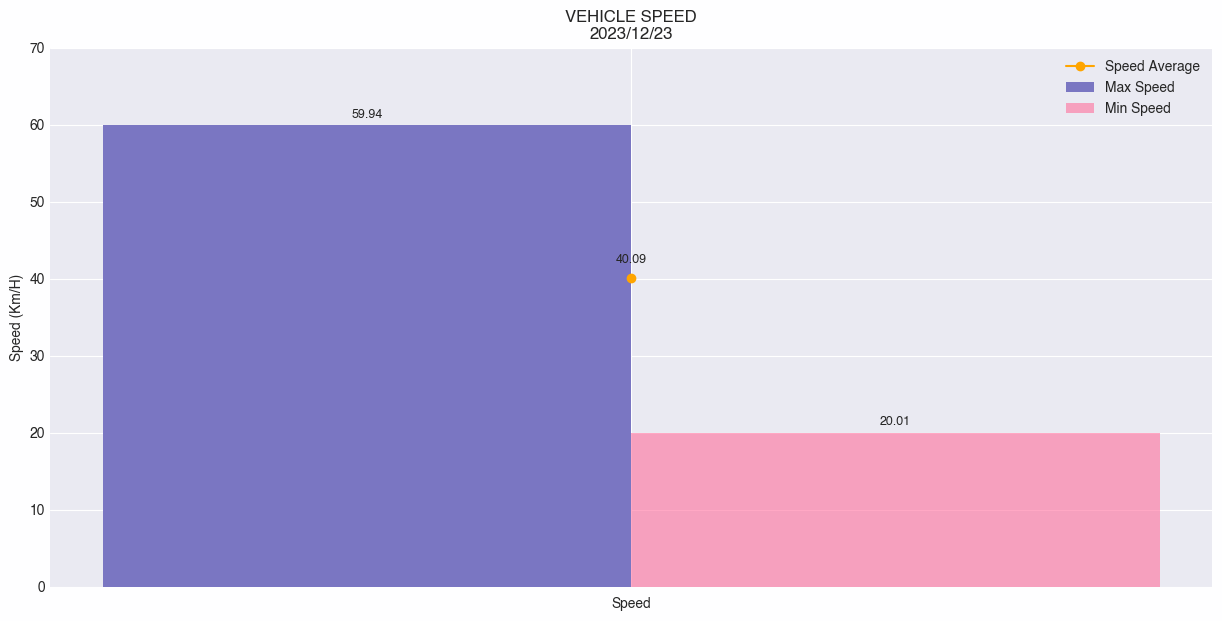

In [116]:
# create data 
col = np.arange(1) 
speed_average_in_hour = []
max_speed_in_hour = []
min_speed_in_hour = []


speed_average_in_hour.append(np.average(df_oneDay['Speed']))
max_speed_in_hour.append(np.max(df_oneDay['Speed']))
min_speed_in_hour.append(np.min(df_oneDay['Speed']))

width = 0.1
  
# plot data in grouped manner of bar type 
plt.figure(figsize=(15,7))
plt.plot(col, speed_average_in_hour, marker='o', color='orange')
plt.bar(col-0.05, max_speed_in_hour, width) 
plt.bar(col+0.05, min_speed_in_hour, width) 

plt.xticks(col, [""], rotation=45) 
plt.xlabel("Speed")  # add X-axis label 
plt.ylabel("Speed (Km/H)")  # add Y-axis label 
plt.legend(["Speed Average", "Max Speed", "Min Speed"])

ax = plt.gca()
ax.set_ylim([0, 70])

for j, v in enumerate(speed_average_in_hour):
    plt.text(j, v+2, str('{:.2f}'.format(v)), fontsize=9, horizontalalignment='center')
for j, v in enumerate(max_speed_in_hour):
    plt.text(j-0.05, v+1, str('{:.2f}'.format(v)), fontsize=9, horizontalalignment='center')
for j, v in enumerate(min_speed_in_hour):
    plt.text(j+0.05, v+1, str('{:.2f}'.format(v)), fontsize=9, horizontalalignment='center')

plt.title("VEHICLE SPEED\n2023/12/23")  # add title 

plt.show() 